## automatic emittance meas

In [1]:
# optionally add scripts location to path
if True:
    import sys
    sys.path.append("../../../")
    sys.path.append("../../")

run_dir = "/home/physics/ml_tuning/20230821_LCLS_Injector/"
print(sys.path)


['/home/physics/rroussel/SLAC_Xopt/lcls/emittance/emittance_optimization', '/usr/local/lcls/tools/python/toolbox', '/usr/local/lcls/package/anaconda/envs/python3.9envs/rhel7/nightly/08-21-2023/lib/python39.zip', '/usr/local/lcls/package/anaconda/envs/python3.9envs/rhel7/nightly/08-21-2023/lib/python3.9', '/usr/local/lcls/package/anaconda/envs/python3.9envs/rhel7/nightly/08-21-2023/lib/python3.9/lib-dynload', '', '/usr/local/lcls/package/anaconda/envs/python3.9envs/rhel7/nightly/08-21-2023/lib/python3.9/site-packages', '../../../', '../../']


In [2]:
from scripts.image import ImageDiagnostic
import yaml

fname = "../../OTR3_config.yml"
image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
image_diagnostic.save_image_location = run_dir
image_diagnostic.n_fitting_restarts = 2
image_diagnostic.visualize = False
image_diagnostic.background_file = run_dir + "OTRS_IN20_621_background.npy"
print(image_diagnostic.yaml())

{screen_name: 'OTRS:IN20:621', array_data_suffix: IMAGE, array_n_cols_suffix: ROI_XNP,
  array_n_rows_suffix: ROI_YNP, resolution_suffix: RESOLUTION, beam_shutter_pv: 'IOC:BSY0:MP01:MSHUTCTL',
  background_file: /home/physics/ml_tuning/20230821_LCLS_Injector/OTRS_IN20_621_background.npy,
  save_image_location: /home/physics/ml_tuning/20230821_LCLS_Injector/, roi: null,
  min_log_intensity: 4.0, bounding_box_half_width: 3.0, wait_time: 0.1, n_fitting_restarts: 2,
  visualize: false, testing: false}



In [3]:
from scripts.automatic_emittance import ScreenEmittanceMeasurement, BeamlineConfig

drift_length = 4.17
beamline_config = BeamlineConfig(
    scan_quad_pv="QUAD:IN20:525:BCTRL",
    scan_quad_range=[-7.0, 1.0],
    scan_quad_length=0.1068,
    transport_matrix_x =[[1.0,    drift_length],
        [ 0.0,    1.0]],
    transport_matrix_y = [[1.0,    drift_length],
        [ 0.0,    1.0]],
    beam_energy=0.135,
)


measurement = ScreenEmittanceMeasurement(
    image_diagnostic=image_diagnostic,
    beamline_config=beamline_config,
    run_dir=run_dir,
    wait_time=3.0,
    n_shots=5,
    n_iterations=10,
    visualize=True
)

measurement.dump_yaml()

CAPUT QUAD:IN20:525:BCTRL -4.447261140109796
CAPUT QUAD:IN20:525:BCTRL -4.625821878834409
CAPUT QUAD:IN20:525:BCTRL 0.9121431427456086
CAPUT QUAD:IN20:525:BCTRL -6.999989986419678
CAPUT QUAD:IN20:525:BCTRL -2.5555567741394043
CAPUT QUAD:IN20:525:BCTRL -1.2626307010650635
CAPUT QUAD:IN20:525:BCTRL -3.4444432258605957
CAPUT QUAD:IN20:525:BCTRL -5.545448303222656
CAPUT QUAD:IN20:525:BCTRL -3.848482608795166
CAPUT QUAD:IN20:525:BCTRL -2.9595961570739746
CAPUT QUAD:IN20:525:BCTRL -2.4747488498687744
CAPUT QUAD:IN20:525:BCTRL -2.3131330013275146
CAPUT QUAD:IN20:525:BCTRL -4.818177223205566


/home/physics/rroussel/SLAC_Xopt/lcls/emittance/emittance_optimization/../../../scripts/characterize_emittance.py:514: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k = torch.tensor(k, **tkwargs)
/home/physics/rroussel/SLAC_Xopt/lcls/emittance/emittance_optimization/../../../scripts/characterize_emittance.py:515: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, **tkwargs)


tensor([0.1222], dtype=torch.float64, grad_fn=<AddBackward0>)


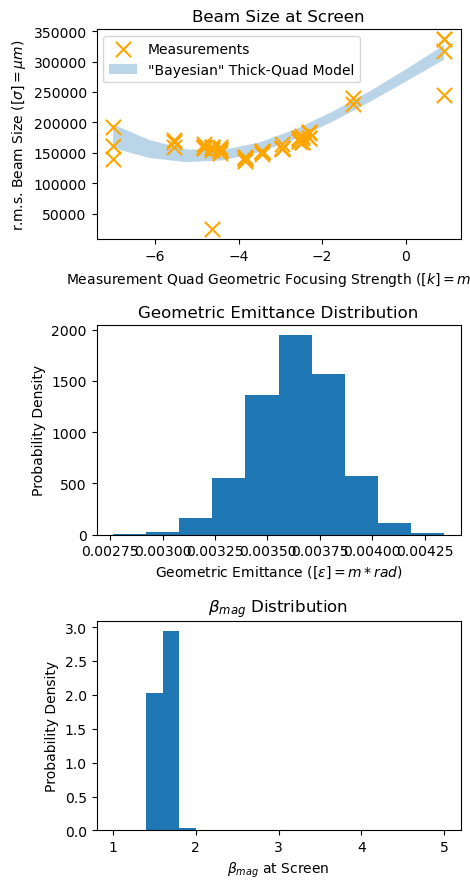

/home/physics/rroussel/SLAC_Xopt/lcls/emittance/emittance_optimization/../../../scripts/characterize_emittance.py:514: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k = torch.tensor(k, **tkwargs)
/home/physics/rroussel/SLAC_Xopt/lcls/emittance/emittance_optimization/../../../scripts/characterize_emittance.py:515: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, **tkwargs)


tensor([0.4517], dtype=torch.float64, grad_fn=<AddBackward0>)


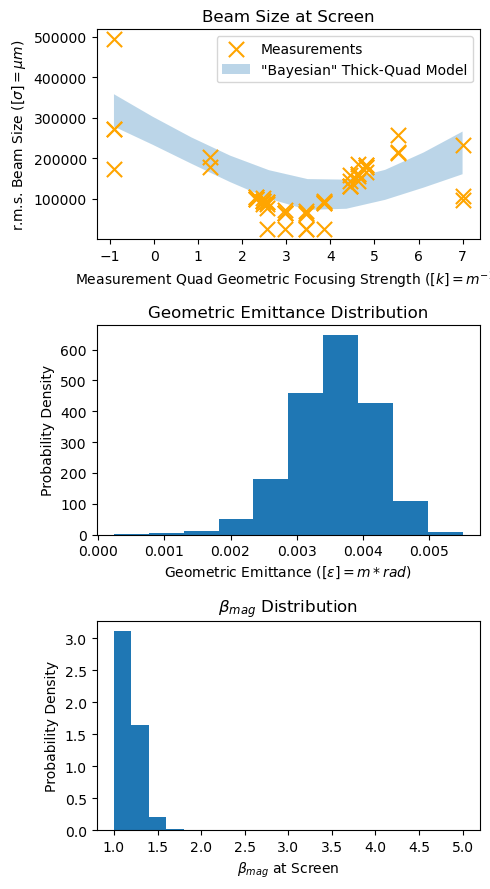

In [4]:
results, emit_x = measurement.run()


In [5]:
emit_x.data

,QUAD:IN20:525:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,log10_total_intensity,save_filename,S_x_mm,S_y_mm,total_size,xopt_runtime,xopt_error
1,-4.447261,428.426559,316.715029,149.366336,130.280129,-185.985955,1188430.0,6.074974,/home/physics/ml_tuning/20230821_LCLS_Injector...,0.149366,0.13028,198.199935,6.860831,False
2,-4.447261,429.346339,317.466463,152.378859,144.427024,-182.82975,1189689.8,6.075434,/home/physics/ml_tuning/20230821_LCLS_Injector...,0.152379,0.144427,209.94876,6.860831,False
3,-4.447261,428.575155,317.15159,155.460649,131.130407,-185.032336,1175104.8,6.070077,/home/physics/ml_tuning/20230821_LCLS_Injector...,0.155461,0.13113,203.379441,6.860831,False
4,-4.447261,428.575475,317.151312,155.467582,131.130164,-185.030793,1175104.8,6.070077,/home/physics/ml_tuning/20230821_LCLS_Injector...,0.155468,0.13113,203.384584,6.860831,False
5,-4.447261,428.434685,317.764159,160.275312,157.809107,-179.889003,1197975.2,6.078448,/home/physics/ml_tuning/20230821_LCLS_Injector...,0.160275,0.157809,224.92641,6.860831,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-4.818177,432.697113,312.370553,164.894922,165.345812,-170.870868,1200497.8,6.079361,/home/physics/ml_tuning/20230821_LCLS_Injector...,0.164895,0.165346,233.51568,5.940144,False
62,-4.818177,432.340718,313.522038,159.954488,178.732373,-170.276109,1208993.0,6.082424,/home/physics/ml_tuning/20230821_LCLS_Injector...,0.159954,0.178732,239.85558,5.940144,False
63,-4.818177,432.341165,313.522184,159.977145,178.740583,-170.270736,1208993.0,6.082424,/home/physics/ml_tuning/20230821_LCLS_Injector...,0.159977,0.178741,239.876807,5.940144,False
64,-4.818177,433.428572,312.078808,158.58021,183.918336,-167.715343,1195784.8,6.077653,/home/physics/ml_tuning/20230821_LCLS_Injector...,0.15858,0.183918,242.844883,5.940144,False
